In [ ]:
import pandas as pd
df = pd.read_excel('DTI_Project_new.xlsx')
print(df.head())

   LATITUDE  LONGITUDE DESTINATION       USERNAME      SOURCEHOST  \
0  47.91542 -120.60306  samplehost       fakeuser    24.16.97.222   
1  52.37022    4.89517  samplehost        CSNYDER   89.248.165.74   
2  40.71455  -74.00714  samplehost  ADMINISTRATOR   72.45.247.218   
3  33.99762   -6.84737  samplehost      AZUREUSER  102.50.242.216   
4  -5.32558  100.28595  samplehost           Test      42.1.62.34   

                STATE        COUNTRY          LABEL   LABEL ADDRESS  \
0          Washington  United States  United States    24.16.97.222   
1       North Holland    Netherlands    Netherlands   89.248.165.74   
2            New York  United States  United States   72.45.247.218   
3  Rabat-Salé-Kénitra        Morocco        Morocco  102.50.242.216   
4              Penang       Malaysia       Malaysia      42.1.62.34   

            TIMESTAMP  
0 2021-10-26 03:28:29  
1 2021-10-26 06:12:56  
2 2021-10-26 10:44:07  
3 2021-10-26 11:03:13  
4 2021-10-26 11:04:45  


In [ ]:
df_cleaned = df.dropna()

In [ ]:
df_cleaned = df.dropna(subset=['STATE'])

In [ ]:
null_state_rows = df[df['STATE'].isnull()]
df_cleaned = df.dropna(subset=['STATE'])

**Random Forest Classifier**


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
df = pd.read_excel('DTI_Project_new.xlsx')

df_encoded = pd.get_dummies(df[['USERNAME', 'STATE', 'COUNTRY', 'SOURCEHOST']])

In [ ]:
X = pd.concat([df_encoded, df[['LATITUDE', 'LONGITUDE']]], axis=1)
y = df['LABEL']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
clf = RandomForestClassifier(random_state=42)

In [ ]:
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
y_pred = clf.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')


Accuracy: 1.00


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

     Germany       1.00      1.00      1.00        13
       India       1.00      1.00      1.00         1
 Netherlands       1.00      1.00      1.00       128
      Russia       1.00      1.00      1.00       113

    accuracy                           1.00       255
   macro avg       1.00      1.00      1.00       255
weighted avg       1.00      1.00      1.00       255



**Logistic Regression model**
**To predict the country from which a username is coming from based on the provided dataset,**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

data = pd.read_excel('DTI_Project_new.xlsx')

le = LabelEncoder()
data['USERNAME'] = le.fit_transform(data['USERNAME'])
data['COUNTRY'] = le.fit_transform(data['COUNTRY'])

X = data[['USERNAME']]
y = data['COUNTRY']


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression()
model.fit(X_train, y_train)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9137254901960784


In [ ]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        13
           1       0.00      0.00      0.00         1
           2       0.86      0.99      0.92       128
           3       0.98      0.94      0.96       113

    accuracy                           0.91       255
   macro avg       0.46      0.48      0.47       255
weighted avg       0.87      0.91      0.89       255



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
####TRYING


Now, in this, we are grouping the 'username' column by counting the occurance of each
The end result is that we got better acccuracy as comapred with non grouped one.

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

data = pd.read_excel('DTI_Project_new.xlsx')

In [ ]:
le = LabelEncoder()
data['USERNAME'] = le.fit_transform(data['USERNAME'])
data['COUNTRY'] = le.fit_transform(data['COUNTRY'])

# Group data by USERNAME and count occurrences
user_counts = data.groupby('USERNAME').size().reset_index(name='USER_COUNT')

data = pd.merge(data, user_counts, on='USERNAME')

X = data[['USER_COUNT']]
y = data['COUNTRY']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9333333333333333


In [ ]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        12
           1       0.00      0.00      0.00         2
           2       0.91      1.00      0.96       128
           3       0.96      1.00      0.98       110
           5       0.00      0.00      0.00         1
           8       0.00      0.00      0.00         1
           9       0.00      0.00      0.00         1

    accuracy                           0.93       255
   macro avg       0.27      0.29      0.28       255
weighted avg       0.87      0.93      0.90       255



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Load the data
data = pd.read_excel('DTI_Project_new.xlsx')

X = data[['LATITUDE', 'LONGITUDE', 'DESTINATION', 'USERNAME', 'SOURCEHOST', 'STATE', 'LABEL']]
y = data['COUNTRY']


In [ ]:
X = pd.get_dummies(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [ ]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)


Accuracy: 1.0


In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 1.0


**Support Vector Machine**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

data = pd.read_excel('DTI_Project_new.xlsx')


In [ ]:
label_encoder = LabelEncoder()
data['SOURCEHOST'] = label_encoder.fit_transform(data['SOURCEHOST'])
data['USERNAME'] = label_encoder.fit_transform(data['USERNAME'])

features = ['LATITUDE', 'LONGITUDE', 'SOURCEHOST', 'USERNAME']
target = 'LABEL'

X = data[features]
y = data[target]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
model = SVC(kernel='rbf')
model.fit(X_train_scaled, y_train)


SVC()

In [ ]:
y_pred = model.predict(X_test_scaled)


In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 1.0


In [ ]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

     Germany       1.00      1.00      1.00        13
       India       1.00      1.00      1.00         1
 Netherlands       1.00      1.00      1.00       128
      Russia       1.00      1.00      1.00       113

    accuracy                           1.00       255
   macro avg       1.00      1.00      1.00       255
weighted avg       1.00      1.00      1.00       255



Now, using ML model to predict username


Random Forest Classifier

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report
data = pd.read_excel('DTI_Project_new.xlsx')


data['YEAR'] = data['TIMESTAMP'].dt.year
data['MONTH'] = data['TIMESTAMP'].dt.month
data['DAY'] = data['TIMESTAMP'].dt.day
data['HOUR'] = data['TIMESTAMP'].dt.hour
data['MINUTE'] = data['TIMESTAMP'].dt.minute

data.drop(columns=['TIMESTAMP'], inplace=True)


In [ ]:
label_encoder = LabelEncoder()
data['SOURCEHOST'] = label_encoder.fit_transform(data['SOURCEHOST'])
data['DESTINATION'] = label_encoder.fit_transform(data['DESTINATION'])
data['COUNTRY'] = label_encoder.fit_transform(data['COUNTRY'])
data['STATE'] = label_encoder.fit_transform(data['STATE'])

features = ['SOURCEHOST', 'DESTINATION', 'COUNTRY', 'STATE', 'YEAR', 'MONTH', 'DAY', 'HOUR', 'MINUTE']
target = 'USERNAME'

X = data[features]
y = data[target]



In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [ ]:
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.2549019607843137


In [ ]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


In [ ]:
## RETRY Random forest Classifier

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Load the dataset
data = pd.read_excel('DTI_Project_new.xlsx')

# Encode categorical variables
label_encoder = LabelEncoder()
data['SOURCEHOST'] = label_encoder.fit_transform(data['SOURCEHOST'])
data['DESTINATION'] = label_encoder.fit_transform(data['DESTINATION'])
data['COUNTRY'] = label_encoder.fit_transform(data['COUNTRY'])
data['STATE'] = label_encoder.fit_transform(data['STATE'])


In [ ]:
data['LOCATION'] = data['COUNTRY'].astype(str) + '_' + data['STATE'].astype(str)

features = ['SOURCEHOST', 'DESTINATION', 'COUNTRY', 'STATE', 'LOCATION']
target = 'USERNAME'

X = data[features]
y = data[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:

# Hyperparameter Tuning
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_

model = RandomForestClassifier(**best_params, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Accuracy: 0.2980392156862745


In [ ]:

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           AC       0.00      0.00      0.00         1
   ACCOUNTING       0.00      0.00      0.00         1
        ADMIN       0.51      0.88      0.64        74
ADMINISTRATOR       0.31      0.06      0.10        66
         ANDY       0.00      0.00      0.00         1
           AR       0.00      0.00      0.00         1
           AV       0.00      0.00      0.00         1
          BEN       0.00      0.00      0.00         1
       BKEXEC       0.00      0.00      0.00         1
   BOARDROSOM       0.00      0.00      0.00         1
       CAREER       0.00      0.00      0.00         1
           CC       0.00      0.00      0.00         1
      CHAMBER       0.00      0.00      0.00         1
      CLAUDIA       0.00      0.00      0.00         1
           CM       0.00      0.00      0.00         1
   CONFERENCE       0.00      0.00      0.00         1
         COPY       0.00      0.00      

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.

XGrade Booster


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report

data = pd.read_excel('DTI_Project_new.xlsx')

label_encoder = LabelEncoder()
data['SOURCEHOST'] = label_encoder.fit_transform(data['SOURCEHOST'])
data['DESTINATION'] = label_encoder.fit_transform(data['DESTINATION'])
data['COUNTRY'] = label_encoder.fit_transform(data['COUNTRY'])
data['STATE'] = label_encoder.fit_transform(data['STATE'])

features = ['SOURCEHOST', 'DESTINATION', 'COUNTRY', 'STATE']
target = 'USERNAME'

X = data[features]
y = data[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

param_grid = {
    'learning_rate': [0.05, 0.1, 0.2],
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 4, 5],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

gb = GradientBoostingClassifier(random_state=42)
grid_search = GridSearchCV(estimator=gb, param_grid=param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_

model = GradientBoostingClassifier(**best_params, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

print("\nClassification Report:")
print(classification_report(y_test, y_pred))


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Here, we used 3 machine learning models to predict 'Username'

Identify anomalous activities based on patterns in latitude, longitude, source host, destination, or user behavior.

In [ ]:
import pandas as pd

data = pd.read_excel('DTI_Project_new.xlsx')
data['TIMESTAMP'] = pd.to_datetime(data['TIMESTAMP'])

time_window = pd.Timedelta(minutes=5)

user_counts = data.groupby('USERNAME').apply(lambda group: group.set_index('TIMESTAMP').resample(time_window).size())

anomalies = user_counts[user_counts > 5]

# Create DataFrame directly from anomalies Series
anomalies_df = pd.DataFrame({'USERNAME': anomalies.index.get_level_values(0),
                             'TIMESTAMP': anomalies.index.get_level_values(1),
                             'OCCURRENCES': anomalies.values})

print("Anomalies (Occurrences > 5 within a 5-minute window):")
print(anomalies_df)


Anomalies (Occurrences > 5 within a 5-minute window):
         USERNAME           TIMESTAMP  OCCURRENCES
0           ADMIN 2024-03-18 09:35:00            9
1           ADMIN 2024-03-18 09:40:00           19
2           ADMIN 2024-03-18 11:10:00           19
3           ADMIN 2024-03-18 11:35:00           38
4           ADMIN 2024-03-18 11:40:00           53
5           ADMIN 2024-03-18 11:45:00           51
6           ADMIN 2024-03-18 11:50:00           45
7           ADMIN 2024-03-18 11:55:00           30
8           ADMIN 2024-03-18 12:00:00           27
9           ADMIN 2024-03-18 12:05:00           34
10          ADMIN 2024-03-18 12:10:00           17
11  ADMINISTRATOR 2024-03-18 09:35:00           16
12  ADMINISTRATOR 2024-03-18 09:40:00           25
13  ADMINISTRATOR 2024-03-18 11:10:00           21
14  ADMINISTRATOR 2024-03-18 11:35:00           37
15  ADMINISTRATOR 2024-03-18 11:40:00           51
16  ADMINISTRATOR 2024-03-18 11:45:00           50
17  ADMINISTRATOR 2024-03-18

 One commonly used approach is to use unsupervised learning methods, especially techniques like **Isolation Forest** || **One-Class SVM**, which don't require labeled data.

In [ ]:
import pandas as pd
from sklearn.ensemble import IsolationForest
from sklearn.svm import OneClassSVM
import matplotlib.pyplot as plt

data = pd.read_excel('DTI_Project_new.xlsx')
data['TIMESTAMP'] = pd.to_datetime(data['TIMESTAMP'])

time_window = pd.Timedelta(minutes=5)

In [ ]:
user_counts = data.groupby('USERNAME').apply(lambda group: group.set_index('TIMESTAMP').resample(time_window).size())

anomalies = user_counts[user_counts > 5]

anomalies_df = anomalies.reset_index()
anomalies_df.columns = ['USERNAME', 'TIMESTAMP', 'OCCURRENCES']

In [ ]:
X = anomalies_df[['TIMESTAMP']]

isolation_forest = IsolationForest()
isolation_forest.fit(X)

one_class_svm = OneClassSVM()
one_class_svm.fit(X)

OneClassSVM()

In [ ]:
# Predict outliers
anomalies_df['IsolationForest_Outlier'] = isolation_forest.predict(X)
anomalies_df['OneClassSVM_Outlier'] = one_class_svm.predict(X)


In this, accuracy can't be procured because we don't have GT (Ground truth) value of the dataset, hence, we are comparing with the help of graph


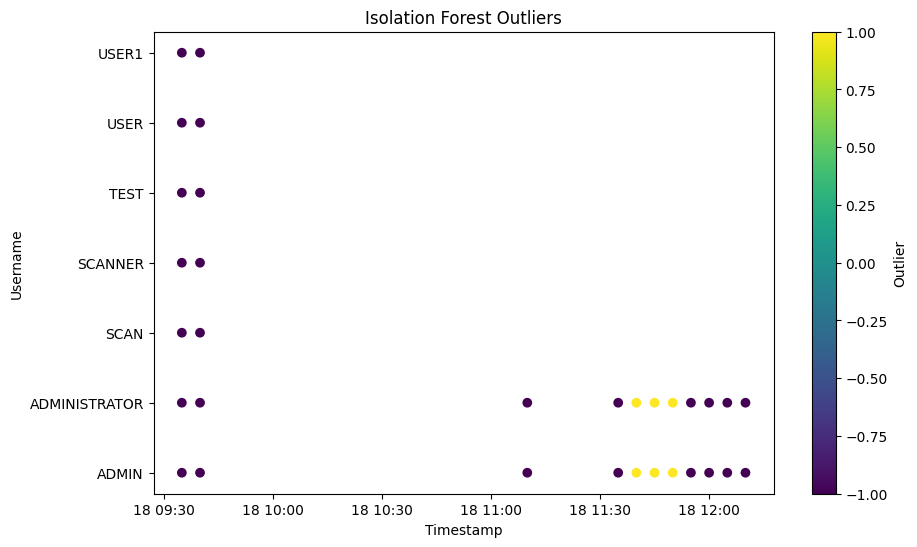

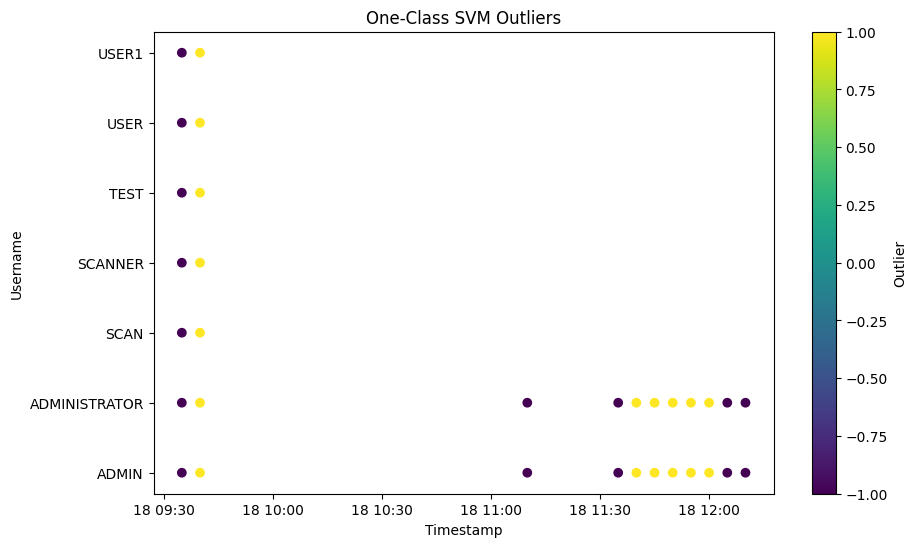

In [ ]:

# Outliers
plt.figure(figsize=(10, 6))
plt.scatter(anomalies_df['TIMESTAMP'], anomalies_df['USERNAME'], c=anomalies_df['IsolationForest_Outlier'], cmap='viridis')
plt.title('Isolation Forest Outliers')
plt.xlabel('Timestamp')
plt.ylabel('Username')
plt.colorbar(label='Outlier')
plt.show()

plt.figure(figsize=(10, 6))
plt.scatter(anomalies_df['TIMESTAMP'], anomalies_df['USERNAME'], c=anomalies_df['OneClassSVM_Outlier'], cmap='viridis')
plt.title('One-Class SVM Outliers')
plt.xlabel('Timestamp')
plt.ylabel('Username')
plt.colorbar(label='Outlier')
plt.show()


Yellow Dot - InLiner ||
Purple Dot - OutLiner - meaning unsual behavior